In [1]:
import scipy.stats
import pandas
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import psycopg2
import re
%matplotlib widget


In [4]:
plt.style.use("bmh")

headers = ['tstamp','longitude','latitude','deep','magnitude']

conn = psycopg2.connect(dbname="lapalma", user="qwatcher", password="11111111", host="192.168.0.1")
cur = conn.cursor()

cur.execute(f"SELECT tstamp,ST_X(ST_AsText(coors)) as longitude ,ST_Y(ST_AsText(coors)) as latitude,ST_Z(ST_AsText(coors)) as deep,ST_M(ST_AsText(coors)) as magnitude from quakes where tstamp>'2020-01-01'")
rows = cur.fetchall()
cur.close()
conn.close()

data = pandas.DataFrame(rows, columns=headers)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
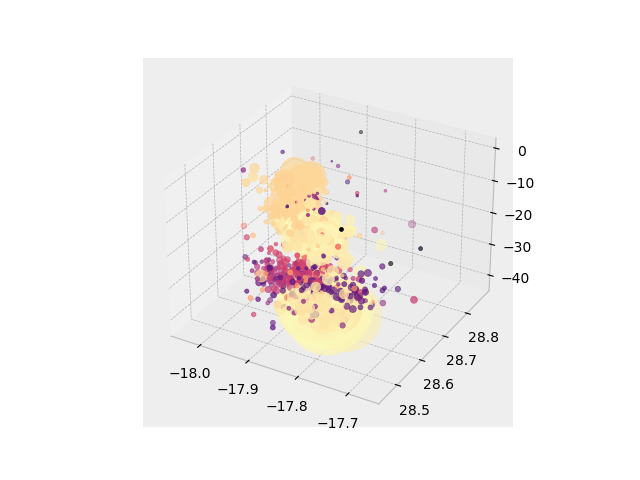

In [5]:
unix=pandas.to_datetime(data.tstamp).view(int)/10**9
y=data.deep
mgn=data.magnitude
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data.longitude,data.latitude,y,s=5**mgn,c=unix,marker='o',cmap='magma')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
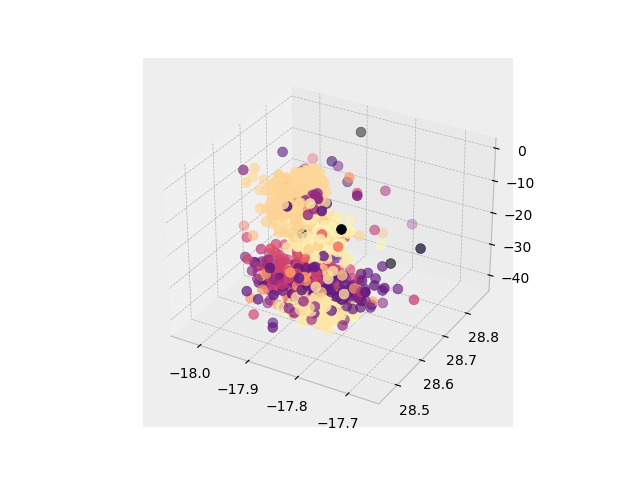

In [6]:
x=data.tstamp
y=data.deep
mgn=data.magnitude
unix=pandas.to_datetime(data.tstamp).view(int)/10**9

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data.longitude,data.latitude,y,s=50,c=unix,marker='o',cmap='magma')

plt.show()